In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
df = pd.read_csv('NSE-TATAGLOBAL11.csv')

In [3]:
# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

In [4]:
#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
new_data

,ds,y
Date,,
2013-10-08,2013-10-08,155.80
2013-10-09,2013-10-09,155.55
2013-10-10,2013-10-10,160.15
2013-10-11,2013-10-11,160.05
2013-10-14,2013-10-14,159.45
...,...,...
2018-10-01,2018-10-01,230.90
2018-10-03,2018-10-03,227.60
2018-10-04,2018-10-04,218.20


In [5]:
#train and validation
train = new_data[:987]
valid = new_data[987:]

In [6]:
#fit the model
model = Prophet()
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-10-08,149.610020,148.617559,167.786973,149.610020,149.610020,8.552483,8.552483,8.552483,-1.511623,-1.511623,-1.511623,10.064107,10.064107,10.064107,0.0,0.0,0.0,158.162503
1,2013-10-09,149.641947,149.065387,167.678897,149.641947,149.641947,8.936520,8.936520,8.936520,-1.375143,-1.375143,-1.375143,10.311663,10.311663,10.311663,0.0,0.0,0.0,158.578467
2,2013-10-10,149.673874,149.558579,168.888396,149.673874,149.673874,9.310458,9.310458,9.310458,-1.263259,-1.263259,-1.263259,10.573717,10.573717,10.573717,0.0,0.0,0.0,158.984332
3,2013-10-11,149.705801,150.364911,168.716540,149.705801,149.705801,9.698001,9.698001,9.698001,-1.145147,-1.145147,-1.145147,10.843148,10.843148,10.843148,0.0,0.0,0.0,159.403802
4,2013-10-14,149.801581,151.753313,170.115722,149.801581,149.801581,10.326781,10.326781,10.326781,-1.290519,-1.290519,-1.290519,11.617300,11.617300,11.617300,0.0,0.0,0.0,160.128362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2018-06-07,245.458838,223.128945,255.883417,232.797014,258.357922,-5.440216,-5.440216,-5.440216,-1.263259,-1.263259,-1.263259,-4.176957,-4.176957,-4.176957,0.0,0.0,0.0,240.018622
1231,2018-06-08,245.677747,224.652017,256.769569,232.957897,258.649734,-5.287187,-5.287187,-5.287187,-1.145147,-1.145147,-1.145147,-4.142040,-4.142040,-4.142040,0.0,0.0,0.0,240.390560
1232,2018-06-09,245.896656,224.946648,257.158581,233.067083,258.930027,-4.757412,-4.757412,-4.757412,-0.649761,-0.649761,-0.649761,-4.107652,-4.107652,-4.107652,0.0,0.0,0.0,241.139244
1233,2018-06-10,246.115565,233.174243,264.703386,233.143398,259.232587,3.164733,3.164733,3.164733,7.235453,7.235453,7.235453,-4.070719,-4.070719,-4.070719,0.0,0.0,0.0,249.280298


In [11]:
forecast_valid = forecast['yhat'][987:]
forecast_valid

987     201.451655
988     209.782436
989     201.722929
990     201.982789
991     202.607609
           ...    
1230    240.018622
1231    240.390560
1232    241.139244
1233    249.280298
1234    241.015678
Name: yhat, Length: 248, dtype: float64

In [12]:
#rmse
rmse = np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rmse 

57.48039594240754

<ipython-input-13-42b4fc8e60d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-13-42b4fc8e60d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = forecast_valid.values


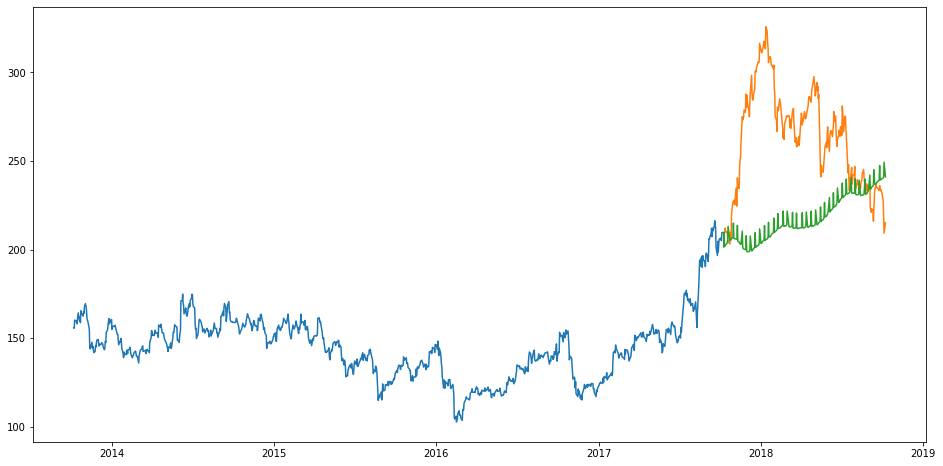

In [13]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.figure(figsize=(16,8))
plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])
plt.show()